In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sqlite3

In [17]:
# read usage data for a building from the database
conn = sqlite3.connect('../db.sqlite3')
usage_df = pd.read_sql_query("SELECT * FROM pma_usage WHERE property_name = 'Charles Shipman Payson Building' AND meter_type = 'Potable Indoor'", conn)
#print(usage_df.head())
usage_dates = ['-'.join((date.split(' ')[0]).split('-')[:-1]) for date in usage_df['start_date']]
usage = list(usage_df['common_usage_units'])

usage_dict, temps_dict = {}, {}

weather_df = pd.read_sql_query("SELECT * FROM pma_weather", conn)
weather_dates = ['-'.join((date.split(' ')[0]).split('-')[:-1]) for date in weather_df['date']]
temp = list(weather_df['temperature'])
#print(len(weather_dates), len(temp), weather_dates[:2], temp[:2])

for date, usg in zip(usage_dates, usage):
    usage_dict[date] = usg
for date, tmp in zip(weather_dates, temp):
    temps_dict[date] = tmp
conn.close()

# dates start at Feb-2012 and end at June-2023

In [18]:
# get usage and temperature for all the dates in usage_dict
monthly_usage, monthly_temp = [], []
for date in usage_dict:
    if date in temps_dict:
        monthly_usage.append(usage_dict[date])
        monthly_temp.append(temps_dict[date])

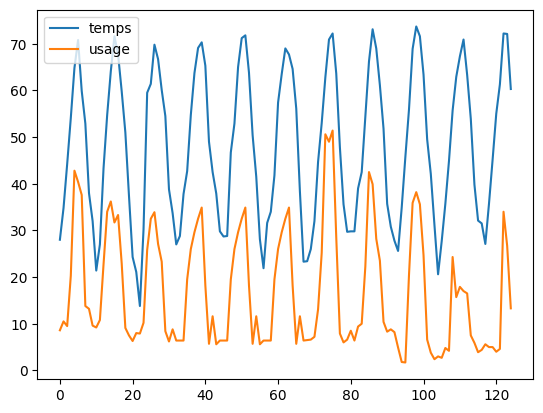

In [19]:
# plot temps; usage
plt.plot(monthly_temp, label='temps')
plt.plot(monthly_usage, label='usage')
plt.legend()
plt.show()

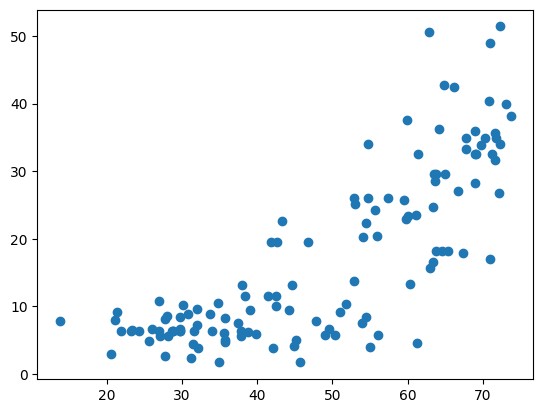

In [20]:
# plot temps on x, usage on y
plt.scatter(monthly_temp, monthly_usage)
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
model.fit(X=np.array(monthly_temp).reshape(-1, 1), y=np.array(monthly_usage))

LinearRegression()

In [30]:
next_months = ['2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06']
temps_dict['2024-06'] = 70
temps_dict['2024-05'] = 65
temps_dict['2024-04'] = 60
temps_dict['2024-03'] = 55
temps_dict['2024-02'] = 50
temps_dict['2024-01'] = 45
temps_dict['2023-12'] = 40

next_temps = [temps_dict[date] for date in next_months]
new_usage = model.predict(np.array(next_temps).reshape(-1, 1))
total_usage = np.concatenate((monthly_usage, new_usage))
total_temps = np.concatenate((monthly_temp, next_temps))

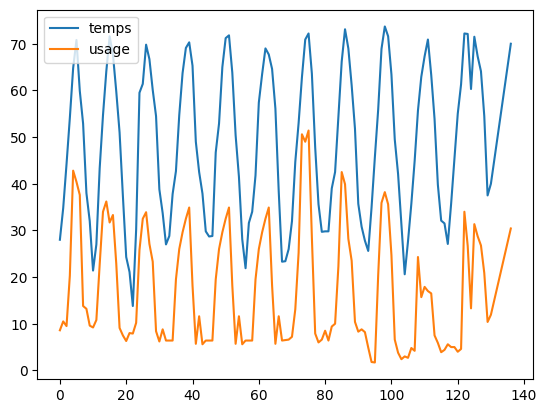

In [31]:
# plot new usage and temps
plt.plot(total_temps, label='temps')
plt.plot(total_usage, label='usage')
plt.legend()
plt.show()